In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 59kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import catboost
from catboost import CatBoostRegressor, Pool

In [ ]:
#Считывание датасета
dataset_path = "/content/drive/My Drive/data_matrix_extended_true"
with open(dataset_path) as f:
  raw_dataset = pd.read_csv(f, sep=" ", error_bad_lines=False)
dataset = raw_dataset.copy()
dataset.tail()

,ID,-1000_-501,-100_0,-200_-101,-5000_-1001,-500_-201,0.0.2.0.1_-1000_-501,0.0.2.0.1_-100_0,0.0.2.0.1_-200_-101,0.0.2.0.1_-5000_-1001,0.0.2.0.1_-500_-201,0.0.2.0.1_101_500,0.0.2.0.1_1_100,0.0.2.0.1_501_1000,0.0.3.0.1_-1000_-501,0.0.3.0.1_-100_0,0.0.3.0.1_-200_-101,0.0.3.0.1_-5000_-1001,0.0.3.0.1_-500_-201,0.0.3.0.1_101_500,0.0.3.0.1_1_100,0.0.3.0.1_501_1000,0.0.6.0.1_-1000_-501,0.0.6.0.1_-100_0,0.0.6.0.1_-200_-101,0.0.6.0.1_-5000_-1001,0.0.6.0.1_-500_-201,0.0.6.0.1_101_500,0.0.6.0.1_1_100,0.0.6.0.1_501_1000,0.2.1.0.1_-1000_-501,0.2.1.0.1_-100_0,0.2.1.0.1_-200_-101,0.2.1.0.1_-5000_-1001,0.2.1.0.1_-500_-201,0.2.1.0.1_101_500,0.2.1.0.1_1_100,0.2.1.0.1_501_1000,1.1.0.1.4_-1000_-501,1.1.0.1.4_-100_0,...,7.1.1.2.1_101_500,7.1.1.2.1_1_100,7.1.1.2.1_501_1000,7.1.2.0.1_-1000_-501,7.1.2.0.1_-100_0,7.1.2.0.1_-200_-101,7.1.2.0.1_-5000_-1001,7.1.2.0.1_-500_-201,7.1.2.0.1_101_500,7.1.2.0.1_1_100,7.1.2.0.1_501_1000,7.1.2.0.3_-1000_-501,7.1.2.0.3_-100_0,7.1.2.0.3_-200_-101,7.1.2.0.3_-5000_-1001,7.1.2.0.3_-500_-201,7.1.2.0.3_101_500,7.1.2.0.3_1_100,7.1.2.0.3_501_1000,8.1.1.0.1_-1000_-501,8.1.1.0.1_-100_0,8.1.1.0.1_-200_-101,8.1.1.0.1_-5000_-1001,8.1.1.0.1_-500_-201,8.1.1.0.1_101_500,8.1.1.0.1_1_100,8.1.1.0.1_501_1000,9.1.1.2.1_-1000_-501,9.1.1.2.1_-100_0,9.1.1.2.1_-200_-101,9.1.1.2.1_-5000_-1001,9.1.1.2.1_-500_-201,9.1.1.2.1_101_500,9.1.1.2.1_1_100,9.1.1.2.1_501_1000,Cell_1424_lg,Cell_1425_lg,Cell_1426_lg,mean_intensity_lg_cell_line,mean_intensity_lg_cell_line_predicted_by_K562_HepG2_GM12878_MCF7_HEK293
209906,F_209906,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008744,0.032016
209907,F_209907,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.030653
209908,F_209908,0.000000,0.00000,0.000000,0.005917,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.032016
209909,F_209909,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020784,0.032016
209910,F_209910,0.035503,0.04142,0.047337,0.071006,0.04142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.003747,-0.012158


In [ ]:
#Удаление ненужных колонок
dataset = dataset.drop(dataset.columns[[0, 1362, 1363, 1364, 1365]],
                       axis='columns')
dataset.tail()

,-1000_-501,-100_0,-200_-101,-5000_-1001,-500_-201,0.0.2.0.1_-1000_-501,0.0.2.0.1_-100_0,0.0.2.0.1_-200_-101,0.0.2.0.1_-5000_-1001,0.0.2.0.1_-500_-201,0.0.2.0.1_101_500,0.0.2.0.1_1_100,0.0.2.0.1_501_1000,0.0.3.0.1_-1000_-501,0.0.3.0.1_-100_0,0.0.3.0.1_-200_-101,0.0.3.0.1_-5000_-1001,0.0.3.0.1_-500_-201,0.0.3.0.1_101_500,0.0.3.0.1_1_100,0.0.3.0.1_501_1000,0.0.6.0.1_-1000_-501,0.0.6.0.1_-100_0,0.0.6.0.1_-200_-101,0.0.6.0.1_-5000_-1001,0.0.6.0.1_-500_-201,0.0.6.0.1_101_500,0.0.6.0.1_1_100,0.0.6.0.1_501_1000,0.2.1.0.1_-1000_-501,0.2.1.0.1_-100_0,0.2.1.0.1_-200_-101,0.2.1.0.1_-5000_-1001,0.2.1.0.1_-500_-201,0.2.1.0.1_101_500,0.2.1.0.1_1_100,0.2.1.0.1_501_1000,1.1.0.1.4_-1000_-501,1.1.0.1.4_-100_0,1.1.0.1.4_-200_-101,...,7.1.1.2.1_-100_0,7.1.1.2.1_-200_-101,7.1.1.2.1_-5000_-1001,7.1.1.2.1_-500_-201,7.1.1.2.1_101_500,7.1.1.2.1_1_100,7.1.1.2.1_501_1000,7.1.2.0.1_-1000_-501,7.1.2.0.1_-100_0,7.1.2.0.1_-200_-101,7.1.2.0.1_-5000_-1001,7.1.2.0.1_-500_-201,7.1.2.0.1_101_500,7.1.2.0.1_1_100,7.1.2.0.1_501_1000,7.1.2.0.3_-1000_-501,7.1.2.0.3_-100_0,7.1.2.0.3_-200_-101,7.1.2.0.3_-5000_-1001,7.1.2.0.3_-500_-201,7.1.2.0.3_101_500,7.1.2.0.3_1_100,7.1.2.0.3_501_1000,8.1.1.0.1_-1000_-501,8.1.1.0.1_-100_0,8.1.1.0.1_-200_-101,8.1.1.0.1_-5000_-1001,8.1.1.0.1_-500_-201,8.1.1.0.1_101_500,8.1.1.0.1_1_100,8.1.1.0.1_501_1000,9.1.1.2.1_-1000_-501,9.1.1.2.1_-100_0,9.1.1.2.1_-200_-101,9.1.1.2.1_-5000_-1001,9.1.1.2.1_-500_-201,9.1.1.2.1_101_500,9.1.1.2.1_1_100,9.1.1.2.1_501_1000,Cell_1424_lg
209906,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209907,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209908,0.000000,0.00000,0.000000,0.005917,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209909,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209910,0.035503,0.04142,0.047337,0.071006,0.04142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=1)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop('Cell_1424_lg')
test_labels = test_dataset.pop('Cell_1424_lg')

In [ ]:
test = Pool(test_dataset)

In [ ]:
model = CatBoostRegressor(num_trees = 1000)
model.fit(train_dataset, train_labels)
model.get_feature_importance()

Learning rate set to 0.097157
0:	learn: 0.6545067	total: 307ms	remaining: 5m 6s
1:	learn: 0.6270508	total: 473ms	remaining: 3m 56s
2:	learn: 0.6033731	total: 656ms	remaining: 3m 37s
3:	learn: 0.5833673	total: 825ms	remaining: 3m 25s
4:	learn: 0.5658439	total: 1.01s	remaining: 3m 20s
5:	learn: 0.5509212	total: 1.18s	remaining: 3m 15s
6:	learn: 0.5384649	total: 1.35s	remaining: 3m 12s
7:	learn: 0.5273292	total: 1.52s	remaining: 3m 8s
8:	learn: 0.5180802	total: 1.69s	remaining: 3m 5s
9:	learn: 0.5104947	total: 1.85s	remaining: 3m 3s
10:	learn: 0.5038447	total: 2.02s	remaining: 3m 1s
11:	learn: 0.4980319	total: 2.19s	remaining: 3m
12:	learn: 0.4932156	total: 2.35s	remaining: 2m 58s
13:	learn: 0.4889916	total: 2.53s	remaining: 2m 58s
14:	learn: 0.4853603	total: 2.69s	remaining: 2m 56s
15:	learn: 0.4822928	total: 2.86s	remaining: 2m 56s
16:	learn: 0.4796460	total: 3.03s	remaining: 2m 55s
17:	learn: 0.4772115	total: 3.2s	remaining: 2m 54s
18:	learn: 0.4750424	total: 3.36s	remaining: 2m 53s
19

array([0.22425731, 2.07414192, 0.38428163, ..., 0.02279304, 0.        ,
       0.00996029])

In [ ]:
preds = model.predict(test)

In [ ]:
preds

array([0.11976832, 0.09262254, 0.13682235, ..., 0.05942017, 0.05970702,
       0.05970702])

In [ ]:
import sklearn
from sklearn import metrics

In [ ]:
cat_mae = metrics.mean_absolute_error(test_labels, preds)
cat_mse = metrics.mean_squared_error(test_labels, preds)

In [ ]:
print(cat_mae, cat_mse)

0.25360906211804113 0.18066752471433906


In [ ]:
import matplotlib.pyplot as plt

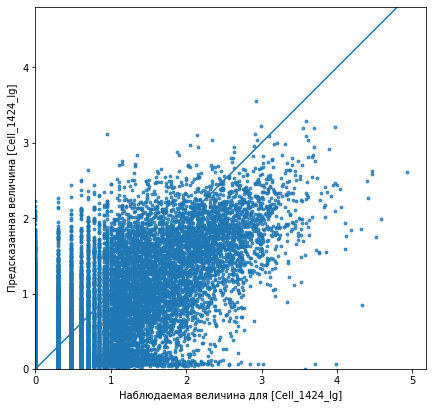

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_labels, preds, s=8, alpha=0.8)
plt.xlabel('Наблюдаемая величина для [Cell_1424_lg]')
plt.ylabel('Предсказанная величина [Cell_1424_lg]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
#0.00008
plt.savefig('/content/drive/My Drive/CatBoostRegression.png')

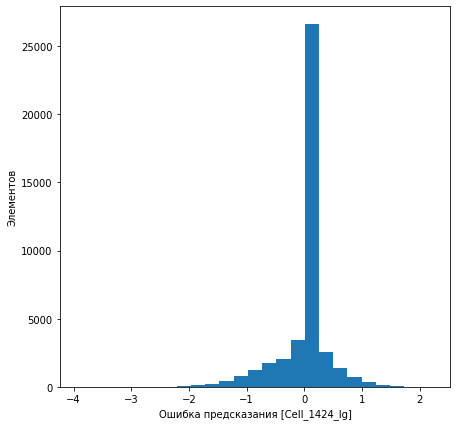

In [ ]:
plt.figure(figsize=(7, 7))
error = preds - test_labels
plt.hist(error, bins=25)
plt.xlabel("Ошибка предсказания [Cell_1424_lg]")
_ = plt.ylabel("Элементов")
plt.savefig('/content/drive/My Drive/CatBoostRegression_MAE_Error.png')
plt.show()

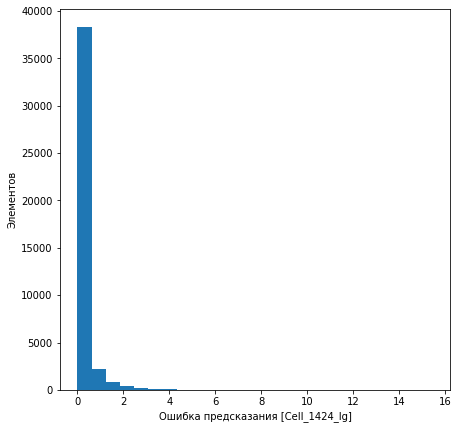

In [ ]:
plt.figure(figsize=(7, 7))
error = (preds - test_labels)**2
plt.hist(error, bins=25)
plt.xlabel("Ошибка предсказания [Cell_1424_lg]")
_ = plt.ylabel("Элементов")
plt.savefig('/content/drive/My Drive/CatBoostRegression_MSE_Error.png')
plt.show()

In [ ]:
preds = pd.Series(preds)

In [ ]:
corr = test_labels.corr(preds)

In [ ]:
corr

-0.00440999048302022

In [ ]:
npcorr = np.corrcoef(test_labels, preds)

In [ ]:
npcorr

array([[1.        , 0.78440312],
       [0.78440312, 1.        ]])

In [ ]:
npcorr**2

array([[1.        , 0.61528826],
       [0.61528826, 1.        ]])